# Stack Overflow Survey

## Some questions to answer before starting a career as a software developer

### Business understanding

In this project, I intend to answer some questions about the world of software development that can help novice developers make the right decisions at the beginning of their careers. To do that, I use the data contained in the Stack Overflow Annual Developer Survey 2019. The questions to answer are:

1. What is the most popular programming language?
2. Does the programming language influence the employment status?
3. Do companies take care of code quality?

I start loading the necessary libraries and data:

In [30]:
import re
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# Results data
results_df = pd.read_csv('data/survey_results_public.csv')

# Data schema
schema_df = pd.read_csv('data/survey_results_schema.csv')

### Data understanding

Data preview

In [31]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [32]:
schema_df.head(100)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...
5,Employment,Which of the following best describes your cur...
6,Country,In which country do you currently reside?
7,Student,"Are you currently enrolled in a formal, degree..."
8,EdLevel,Which of the following best describes the high...
9,UndergradMajor,What was your main or most important field of ...


To answer my questions of interest, I need data about language, employment status and best programming practices.

**Language**

In [33]:
schema_df[schema_df['QuestionText'].str.contains('language', flags=re.IGNORECASE)]

,Column,QuestionText
43,LanguageWorkedWith,"Which of the following programming, scripting,..."
44,LanguageDesireNextYear,"Which of the following programming, scripting,..."


The language information is in `LanguageWorkedWith`.

**Employment**

In [34]:
schema_df[schema_df['Column'] == 'Employment']['QuestionText'].values

array(['Which of the following best describes your current employment status?'],
      dtype=object)

This information is in the `Employment` column.

**Best programming practices**

This survey asks about unit tests and code reviews.

In [35]:
schema_df[schema_df['Column'] == 'UnitTests']['QuestionText'].values

array(['Does your company regularly employ unit tests in the development of their products?'],
      dtype=object)

In [36]:
schema_df[schema_df['Column'] == 'CodeRev']['QuestionText'].values

array(['Do you review code as part of your work?'], dtype=object)

This information is in the `UnitTests` and `CodeRev` columns.

### Data preparation

The respondent is in column `Respondent`.

So I keep the columns `Respondent`, `Employment`, `LanguageWorkedWith`, `UnitTests` and `CodeRev` in a new dataset.

In [37]:
clean_results = results_df[['Respondent', 'LanguageWorkedWith', 'Employment', 'UnitTests', 'CodeRev']]

In [38]:
clean_results.head()

,Respondent,LanguageWorkedWith,Employment,UnitTests,CodeRev
0,1,HTML/CSS;Java;JavaScript;Python,"Not employed, and not looking for work",NaN,NaN
1,2,C++;HTML/CSS;Python,"Not employed, but looking for work",NaN,NaN
2,3,HTML/CSS,Employed full-time,"No, but I think we should",No
3,4,C;C++;C#;Python;SQL,Employed full-time,"No, but I think we should",No
4,5,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Employed full-time,"Yes, it's part of our process","Yes, because I see value in code review"


I want to extract some information about programming languages, and I can only do that if I know what they are, so I will delete all the rows in which this value is missing.

In [39]:
clean_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 5 columns):
Respondent            88883 non-null int64
LanguageWorkedWith    87569 non-null object
Employment            87181 non-null object
UnitTests             62668 non-null object
CodeRev               70390 non-null object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [40]:
clean_results = clean_results.dropna(subset=['LanguageWorkedWith'])

In [41]:
clean_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87569 entries, 0 to 88882
Data columns (total 5 columns):
Respondent            87569 non-null int64
LanguageWorkedWith    87569 non-null object
Employment            86018 non-null object
UnitTests             62369 non-null object
CodeRev               70033 non-null object
dtypes: int64(1), object(4)
memory usage: 4.0+ MB


In addition, I will need a list of programming languages:

In [45]:
def languages_s():
    """Returns a pandas.Series of languages
    
    :return: a pandas.Series of languages
    """
    return pd.DataFrame(clean_results['LanguageWorkedWith'].str.split(';').tolist()).stack()

def languages_list():
    """Returns a list of unique programming languages
    
    :return: List of unique programming languages
    """
    languages = languages_s()
    
    return languages.unique().tolist()

I need employment status information, so I will delete the rows with missing employment status.

In [46]:
employment_df = clean_results[['LanguageWorkedWith', 'Employment']].dropna(subset=['Employment'])

In [47]:
employment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86018 entries, 0 to 88882
Data columns (total 2 columns):
LanguageWorkedWith    86018 non-null object
Employment            86018 non-null object
dtypes: object(2)
memory usage: 2.0+ MB


With one hot encoding, I will convert each programming language in a column:

In [48]:
def split_values(val, search):
    try:
        if val.find(search) >-1:
            return 1
        else:
            return 0
    except AttributeError:
        return 0

languages = languages_list()
for language in languages:        
    employment_df[language] = employment_df['LanguageWorkedWith'].apply(split_values, args=(language,))

In [49]:
employment_df.head()

,LanguageWorkedWith,Employment,HTML/CSS,Java,JavaScript,Python,C++,C,C#,SQL,...,Assembly,Kotlin,Swift,Objective-C,Elixir,Erlang,Clojure,F#,Scala,Dart
0,HTML/CSS;Java;JavaScript;Python,"Not employed, and not looking for work",1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C++;HTML/CSS;Python,"Not employed, but looking for work",1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HTML/CSS,Employed full-time,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C;C++;C#;Python;SQL,Employed full-time,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Employed full-time,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


This is a list of employment statuses:

In [50]:
employments = employment_df['Employment'].unique()
employments

array(['Not employed, and not looking for work',
       'Not employed, but looking for work', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time', 'Retired'], dtype=object)

I want to know if it is more likely to have a job as a programmer of a particular language. I will create two groups: employed and unemployed.

In [51]:
employment_df = employment_df[~employment_df['Employment'].isin(['Not employed, and not looking for work', 'Retired'])]

In [52]:
def is_employed(status):
    """Returns 1 if respondent is employed and 0 otherwise
    
    :param: Respondent answer
    :return: 1 if respondent is employed, 0 otherwise
    """
    if status == 'Not employed, but looking for work':
        return 0
    
    return 1

In [53]:
employment_df['employed'] = employment_df['Employment'].apply(is_employed)

In [54]:
employment_df.head()

,LanguageWorkedWith,Employment,HTML/CSS,Java,JavaScript,Python,C++,C,C#,SQL,...,Kotlin,Swift,Objective-C,Elixir,Erlang,Clojure,F#,Scala,Dart,employed
1,C++;HTML/CSS;Python,"Not employed, but looking for work",1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HTML/CSS,Employed full-time,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,C;C++;C#;Python;SQL,Employed full-time,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
4,C++;HTML/CSS;Java;JavaScript;Python;SQL;VBA,Employed full-time,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
5,Java;R;SQL,Employed full-time,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


To know the employment rate per programming language, I will create a dataframe which columns will be the language, the employment rate percentages of this language and the unemployment rate percentage.

In [70]:
def employment_rate_perc():
    """Creates and returns a dataframe which columns are:
        language = programming language
        employed = employment rate percentage
        unemployed = unemployment rate percentage
    
    :return: the mployment_rate_perc_df DataFrame
    """
    lang_emp_status = []

    languages = languages_list()
    for language in languages:
        total = num_unemployed = employment_df.loc[:, language].sum()

        num_unemployed = employment_df.loc[employment_df['employed'] == 0, language].sum()
        num_employed = employment_df.loc[employment_df['employed'] == 1, language].sum()

        lang_emp_status.append({'language': language, 
                                'employed': num_employed/total * 100,
                                'unemployed': num_unemployed / total * 100})

    employment_rate_perc_df = pd.DataFrame(lang_emp_status, columns=['language', 'employed', 'unemployed'])
    
    return employment_rate_perc_df

I will prepare data for the third question. In this case, I can't assume any value for missing values. I think the best strategy is to remove them instead of inferring.

In [58]:
quality_df = clean_results[['UnitTests', 'CodeRev']].dropna()
quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62214 entries, 2 to 88330
Data columns (total 2 columns):
UnitTests    62214 non-null object
CodeRev      62214 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


In [59]:
quality_df['UnitTests'].unique()

array(['No, but I think we should', "Yes, it's part of our process",
       "Yes, it's not part of our process but the developers do it on their own",
       "No, and I'm glad we don't"], dtype=object)

In [60]:
quality_df['CodeRev'].unique()

array(['No', 'Yes, because I see value in code review',
       'Yes, because I was told to do so'], dtype=object)

I will convert these answers into binary values.

In [61]:
quality_df['CodeRev'] = quality_df['CodeRev'].apply(lambda x: 1 if x.startswith('Yes') else 0)
quality_df['UnitTests'] = quality_df['UnitTests'].apply(lambda x: 1 if x.startswith('Yes') else 0)

In [62]:
quality_df.head()

,UnitTests,CodeRev
2,0,0
3,0,0
4,1,1
5,1,0
8,1,1


### Data modeling

It is not necessary to create machine learning models

### Evaluating results. Answering questions

**`1.` What is the most popular programming language?**

Let's see what the most popular programming language is.

In [63]:
languages = languages_s()

The ranking of languages is as follows:

In [65]:
lang_ranking = languages.value_counts().sort_values(ascending=False)
lang_ranking

JavaScript               59219
HTML/CSS                 55466
SQL                      47544
Python                   36443
Java                     35917
Bash/Shell/PowerShell    31991
C#                       27097
PHP                      23030
C++                      20524
TypeScript               18523
C                        18017
Other(s):                 7920
Ruby                      7331
Go                        7201
Assembly                  5833
Swift                     5744
Kotlin                    5620
R                         5048
VBA                       4781
Objective-C               4191
Scala                     3309
Rust                      2794
Dart                      1683
Elixir                    1260
Clojure                   1254
WebAssembly               1015
F#                         973
Erlang                     777
dtype: int64

Let's look at the ranking in a graph.

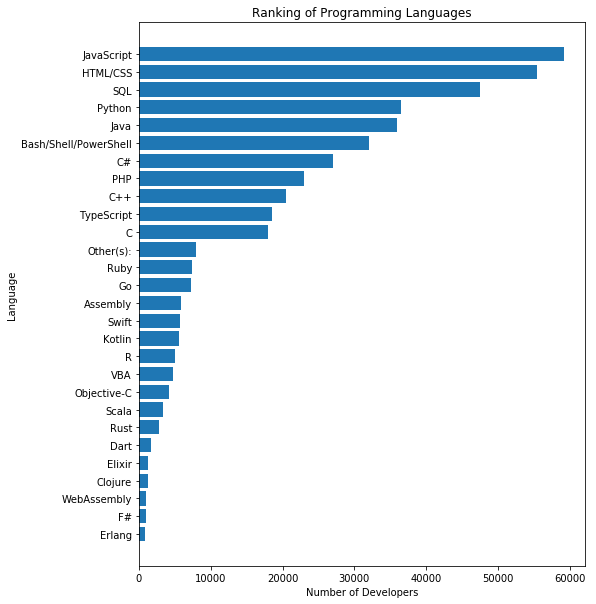

In [66]:
fig, ax = plt.subplots(figsize=(8, 10))
    
ax.barh(lang_ranking.index, lang_ranking.values)
ax.set_title('Ranking of Programming Languages')
ax.set_xlabel('Number of Developers')
ax.set_ylabel('Language')
ax.invert_yaxis()
fig.savefig('popular_languages.png', bbox_inches='tight')
plt.show();

The winner is JavaScript, followed by HTML/CSS; this indicates the importance of front-end development. The third is SQL and the fourth Python; probably because of its intensive use in the field of Data Science. It's impressive how Python has surpassed a classic like Java. A situation that was unthinkable just a few years ago.

I observed a gap after C, where languages used for particular tasks appear. I'm surprised to see Ruby's position. Do you remember when it was the sexiest language?

**`2.` Does the programming language influence the employment status?**


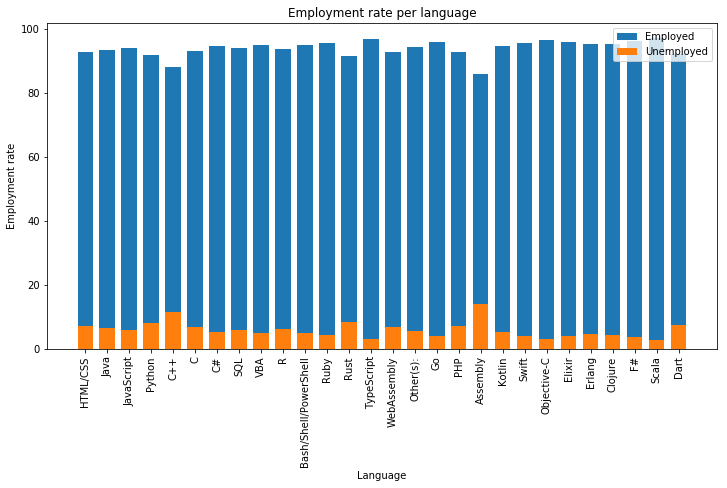

In [71]:
employment_status_df = employment_rate_perc()

plt.subplots(figsize=(12, 6))

width = 0.7
plt.bar(employment_status_df['language'], employment_status_df['employed'], width=width, label='Employed')
plt.bar(employment_status_df['language'], employment_status_df['unemployed'], width, label='Unemployed')
plt.title('Employment rate per language')
plt.ylabel('Employment rate')
plt.xlabel('Language')
plt.xticks(rotation=90)
plt.legend(loc='best')
plt.savefig('employment.png', bbox_inches='tight')
plt.show();

In general, the unemployment rate is low among developers. The languages that follow the functional paradigm like Scala or Elixir have quite the best employment rates and one of the lowest unemployment rates. On the other hand, old acquaintances as C ++ and Assembly do not go through their best moment. It may be that the difficulty of these languages makes companies bet on other technologies.

**`3.` Do companies take care of code quality?**

Two of the most important quality indicators in the code are unit tests and code reviews. Sometimes, these practices do not receive the attention they deserve. Tight schedules and projects' deadlines put a lot of pressure on developers who choose to spend that time in writing code instead of writing tests and reviewing code.

In [72]:
utests_percent = quality_df['UnitTests'].value_counts(normalize=True) * 100
utests_percent

1    62.304304
0    37.695696
Name: UnitTests, dtype: float64

In [73]:
crev_percent = quality_df['CodeRev'].value_counts()
crev_percent

1    48037
0    14177
Name: CodeRev, dtype: int64

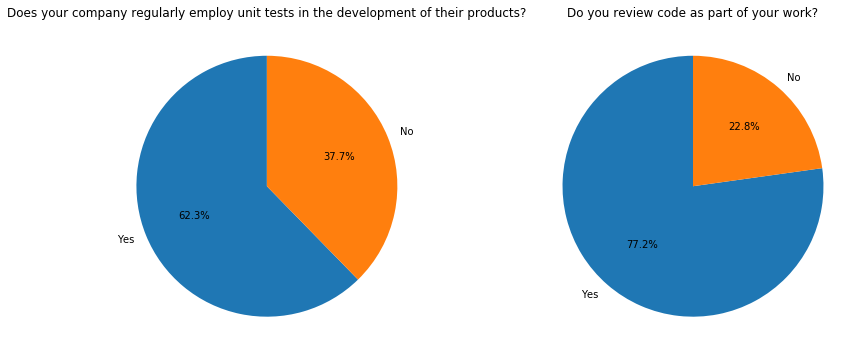

In [74]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

labels = ['Yes', 'No']
ax1.pie(utests_percent, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Does your company regularly employ unit tests in the development of their products?')

ax2.pie(crev_percent, labels=labels, autopct='%1.1f%%', startangle=90)
ax2.set_title('Do you review code as part of your work?')

fig.savefig('best_practices.png', bbox_inches='tight')
plt.show()

Good news! Most developers follow the best programming practices in their work. But there is still a long way to go.

Although most programmers create unit tests for their code, there are more than a third that don't. And believe me, code without a test is a severe problem. Maybe not today, not tomorrow, but someday that code will become a headache.

As for code reviews, the problem is not so critical. But the benefits of doing them are enormous. Especially at the beginning of your career as a professional programmer, having a senior developer review your code is an excellent opportunity to learn from someone more skilled. I don't know any school that teaches that kind of thing.